In [665]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import missingno as mso
import seaborn as sns
from sklearn.datasets import load_boston

In [666]:
boston = load_boston()

In [667]:
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names
data['PRICE'] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [668]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [669]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [670]:
data['ZN'] = data['ZN'].replace(0,data.ZN.mean())
data['CHAS'] = data['CHAS'].replace(0,data.CHAS.mean())

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

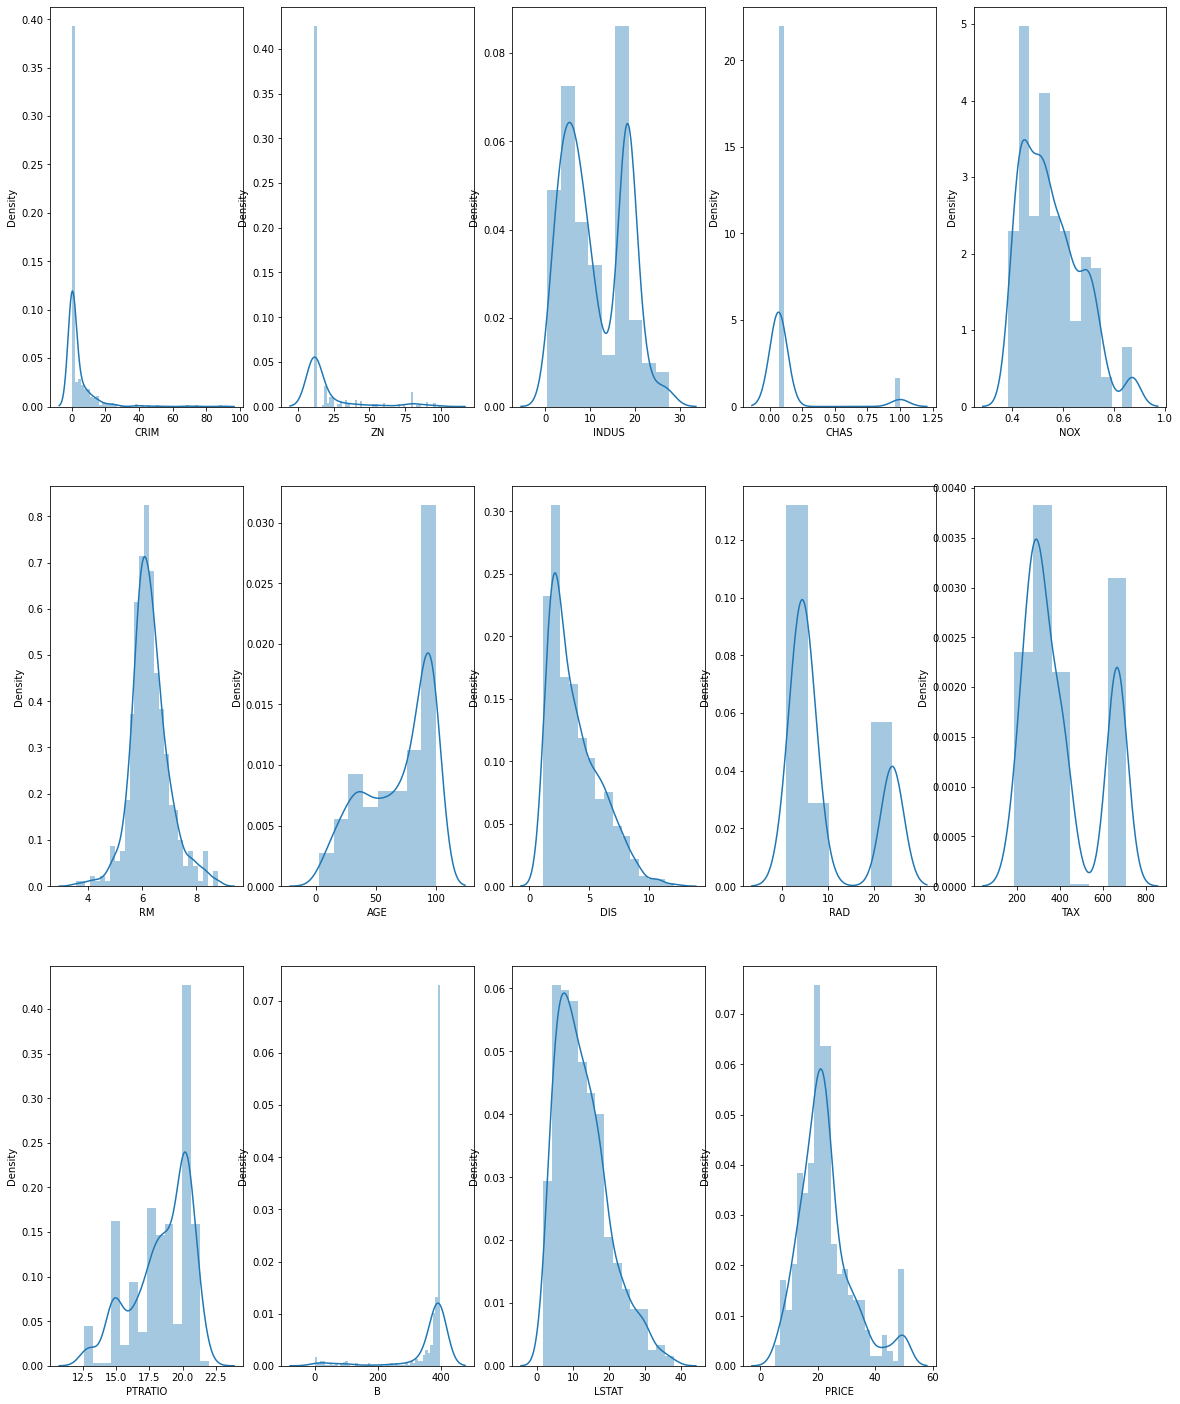

In [671]:
plt.figure(figsize=(20,25))
plotnumber = 1

for i in data.columns:
    if plotnumber <= 14:
        ax = plt.subplot(3,5,plotnumber)
        sns.distplot(data[i])
    plotnumber+=1
        

<AxesSubplot:>

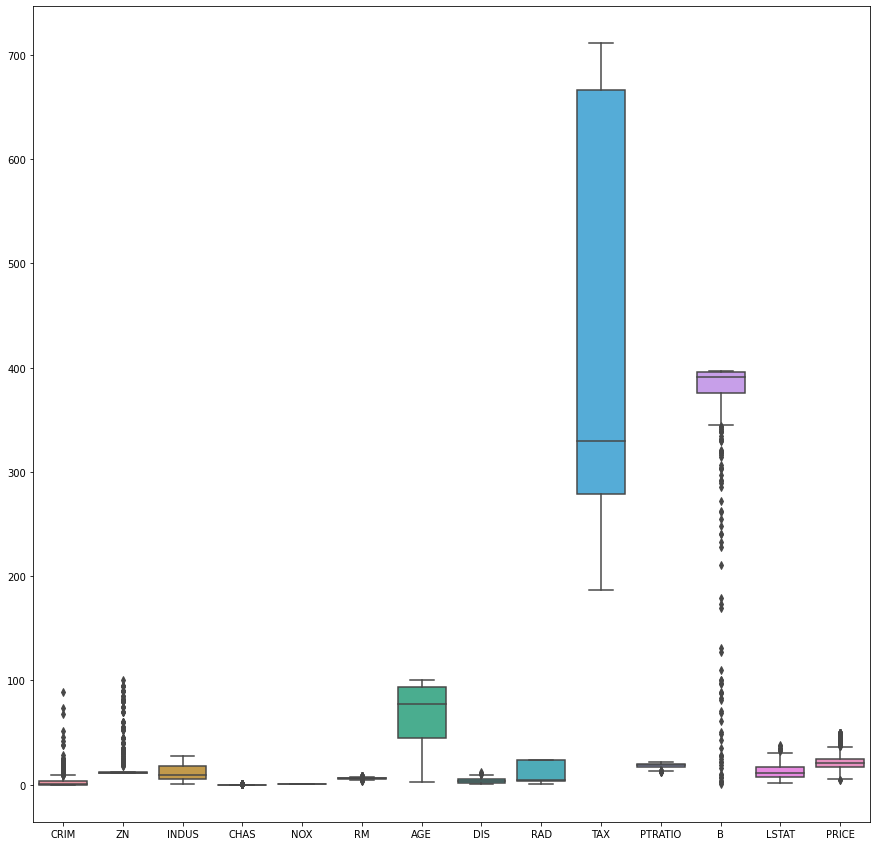

In [672]:
plt.figure(figsize=(15,15))
sns.boxplot(data=data)

In [673]:
#removing top 2% data
q = data['CRIM'].quantile(0.98)
data_clean = data[data['CRIM'] < q]
#removing top 2% data
q = data['ZN'].quantile(0.98)
data_clean = data[data['ZN'] < q]
#removing top 5% data
q = data['B'].quantile(0.95)
data_clean = data[data['B'] < q]
#removing top 3% data
q = data['PRICE'].quantile(0.97)
data_clean = data[data['PRICE'] < q]


<AxesSubplot:>

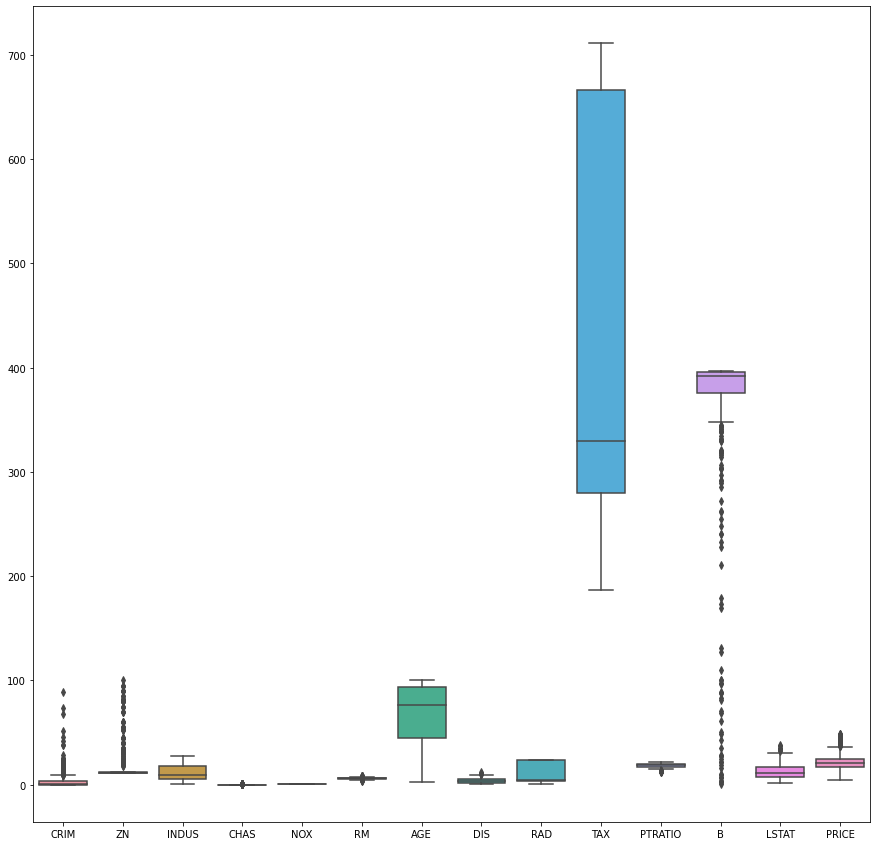

In [674]:
plt.figure(figsize=(15,15))
sns.boxplot(data=data_clean)

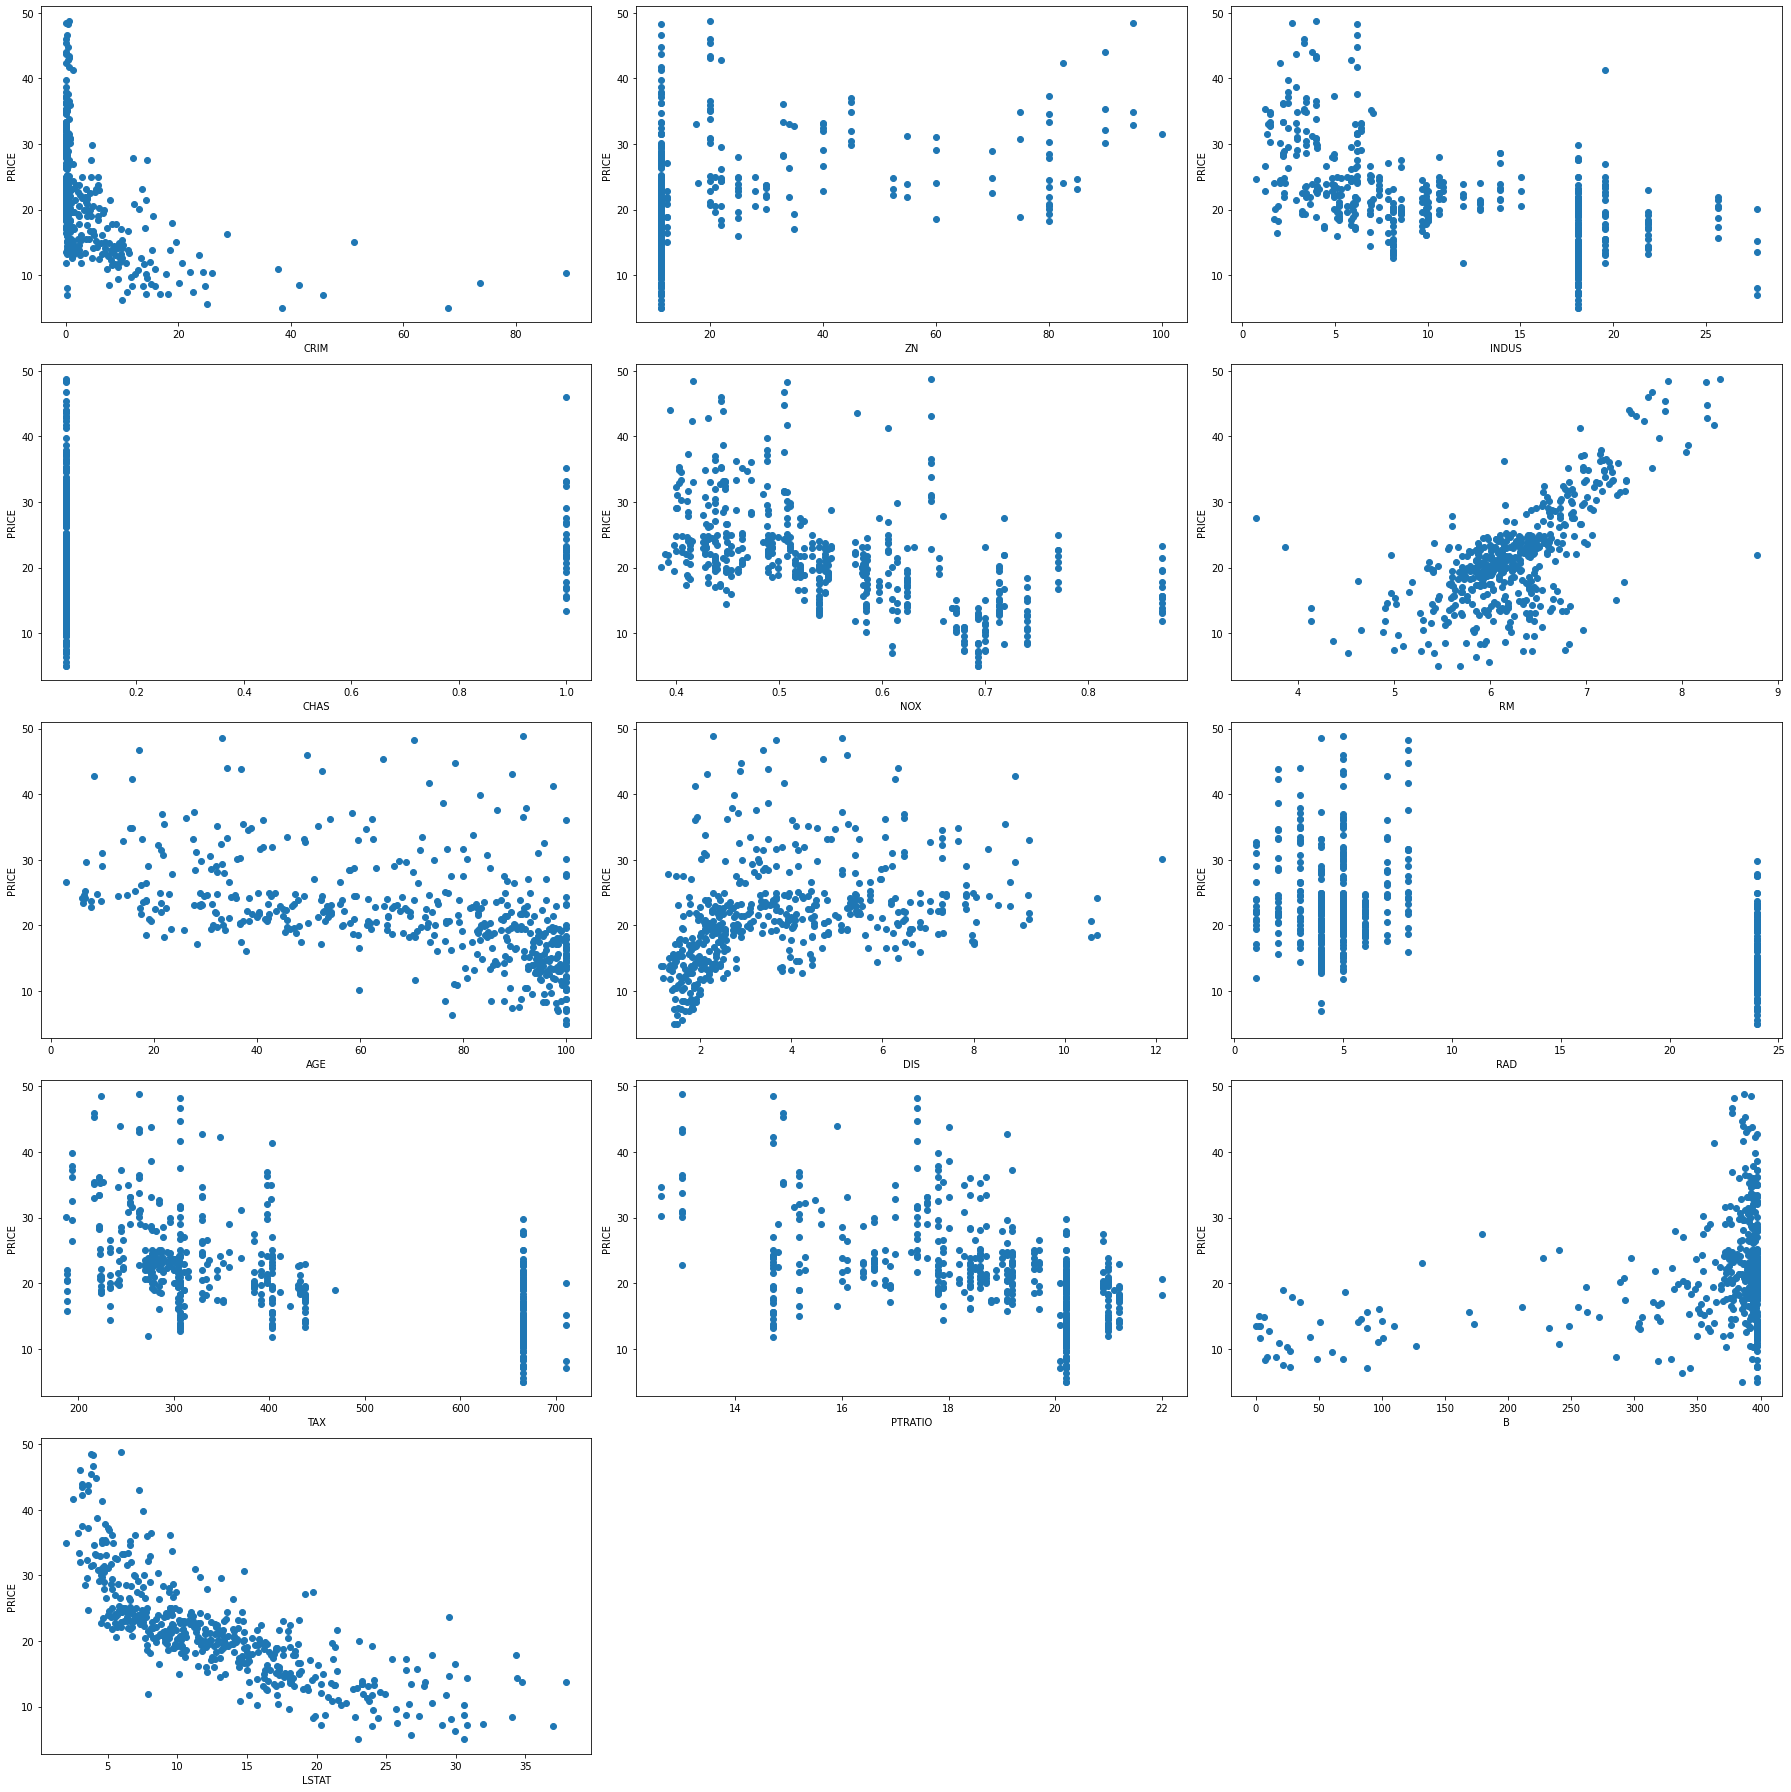

In [675]:
X = data_clean.drop('PRICE',axis=1)
y = data_clean['PRICE']
pltnum = 1
plt.figure(figsize=(25,25))
for i in X.columns:
    if pltnum <= 15:
        plt.subplot(5,3,pltnum)
        plt.scatter(x = X[i],y = y)
        plt.xlabel(i)
        plt.ylabel('PRICE')
    pltnum +=1
plt.tight_layout()


### Standardization 

In [676]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
#X = X.drop(['TAX','RAD'],axis=1)
X_scaled = scalar.fit_transform(X)

### Correlation

<AxesSubplot:>

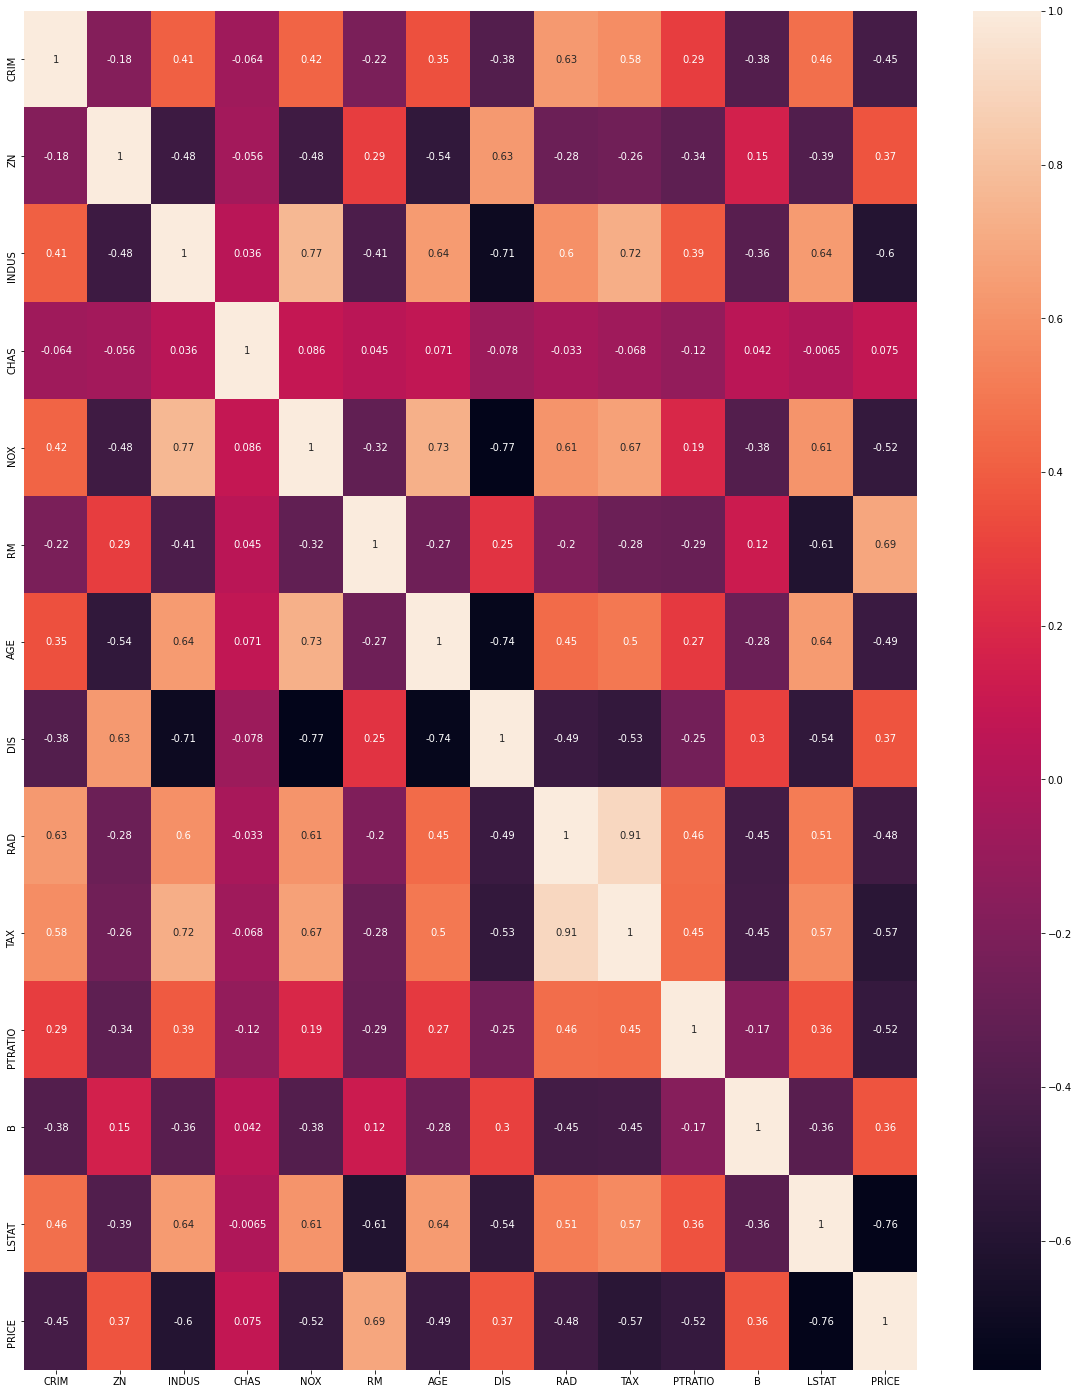

In [677]:
plt.figure(figsize=(20,25))
correlation_matrix = data_clean.corr()
sns.heatmap(data=correlation_matrix,annot=True)

### VIF

In [678]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,1.794494,CRIM
1,2.024140,ZN
2,3.990748,INDUS
3,1.062146,CHAS
4,4.401458,NOX
5,1.878283,RM
6,3.119696,AGE
7,3.821511,DIS
8,7.434658,RAD
9,8.895284,TAX


In [679]:
d = pd.DataFrame(X_scaled)
d.columns = boston.feature_names
d.drop(['TAX','RAD'],axis=1,inplace=True)

In [680]:
X = d[['RM','LSTAT','NOX','PTRATIO','B','DIS']]
y = data_clean['PRICE']

### Splitting data

In [681]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Simple Linear Regression

In [682]:
from sklearn.linear_model import LinearRegression as lr
lin_reg = lr()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [683]:
lin_reg.score(X_test,y_test)

0.7230107120273435

In [684]:
lin_reg.score(X_train,y_train)

0.7556494209710435

In [685]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='PRICE ~ RM+LSTAT+NOX+PTRATIO+DIS+B ', data=data_clean).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     243.2
Date:                Wed, 06 Jan 2021   Prob (F-statistic):          1.87e-142
Time:                        15:26:06   Log-Likelihood:                -1364.4
No. Observations:                 490   AIC:                             2743.
Df Residuals:                     483   BIC:                             2772.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.0706      4.021      7.479      0.000      22.171      37.971
RM             4.0185      0.353     11.385      0.000       3.325       4.712
LSTAT         -0.4181      0.040    -10.382      0.000      -0.497      -0.339
NOX          -17.2931      2.635     -6.563      0.000     -22.470     -12.116
PTRATIO       -1.0111      0.092    -10.959      0.000      -1.192      -0.830
DIS           -0.7862      0.135     -5.815      0.000      -1.052      -0.521
B              0.0090      0.002      4.192      0.000       0.005       0.013
==============================================================================
Omnibus:                       71.370   Durbin-Watson:                   1.183
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.005
Skew:                           0.846   Prob(JB):                     1.31e-29
Kurtosis:                       4.911   Cond. No.                     8.96e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Saving the file


In [686]:
import pickle
filename = 'finalized_model.pickle'
pickle.dump(lin_reg, open(filename, 'wb'))